## REGRESSION MODEL DEVELOPMENT

In [42]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ARDRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
#setting the file name 
file = "./birthweight_low.xlsx"

#reading the file into python
bw = pd.read_excel( io = file,
                    sheet_name = 0, 
                    header = 0)

#outputting the first 5 rows
bw.head(n = 5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


## Analyzing the Data 


In [43]:
#viewing the number of rows and columns of the dataframe
bw.shape

(196, 18)

In [44]:
#Information of each variable 
bw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


## Treating the Data

In [45]:
#Viewing the variables that have missing values
bw.isnull().any()

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

In [46]:
#viewing the sum of missing values for each variable
bw.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [47]:
#viewing the total missing values in the DF
bw.isnull().sum(axis = 0).sum(axis = 0)

13

In [48]:
#using the descriptive statistic to identify the continuos variables 
bw.describe().round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


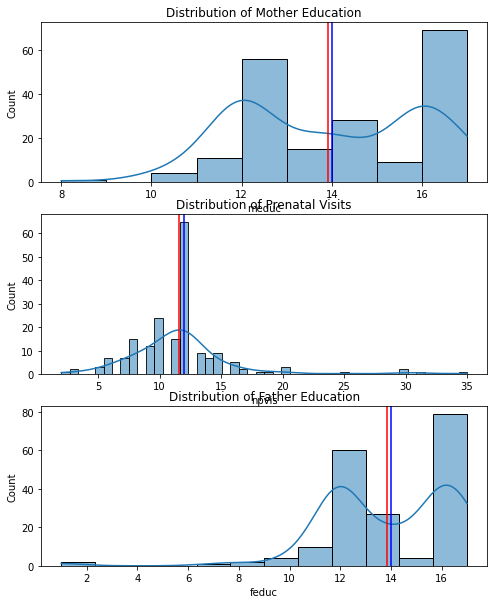

<Figure size 432x288 with 0 Axes>

In [49]:
#Histograms to analyze with what values we can treat the missing values. 
#figure size
fig, ax = plt.subplots(figsize = [8, 10])
#plotting the histograms in the same area. 
plt.subplot(3, 1, 1)
#viewing the distribution for the variables that have missing values. 
#histogram for mother education variable
sns.histplot(data   = bw,
             x      = "meduc",
             kde    = True)

# title and axis labels
plt.title(label   = "Distribution of Mother Education")
plt.xlabel(xlabel = "meduc") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
#drawing the mean and median.
plt.axvline(x = bw['meduc'].mean(),
            color = 'red')
plt.axvline(x = bw['meduc'].median(),
            color = 'blue')


#histogram for number of prenatal visits variable
plt.subplot(3, 1, 2)

sns.histplot(data   = bw,
             x      = "npvis",
             kde    = True)
# title and axis labels
plt.title(label   = "Distribution of Prenatal Visits")
plt.xlabel(xlabel = "npvis") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
#drawing the mean and median.
plt.axvline(x = bw['npvis'].mean(),
            color = 'red')
plt.axvline(x = bw['npvis'].median(),
            color = 'blue')


#histogram for father education variable
plt.subplot(3, 1, 3)
sns.histplot(data   = bw,
             x      = "feduc",
             kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Father Education")
plt.xlabel(xlabel = "feduc") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")
#drawing the mean and median. 
plt.axvline(x = bw['feduc'].mean(),
            color = 'red')


plt.axvline(x = bw['feduc'].median(),
            color = 'blue')

# displaying the histogram
plt.show()
plt.tight_layout()

In [50]:
#flagging the missing values 
for col in bw:

    # creating columns with 1s if missing and 0 if not
    if bw[col].isnull().astype(int).sum() > 0:
        bw['m_'+col] = bw[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
bw[    ['m_meduc', 'm_npvis',
             'm_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

In [51]:
# filling the missing values of m_meduc
meduc_median = bw['meduc'].median()


# filling carat NAs with MEDIAN
bw['meduc'].fillna(value = meduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(bw['meduc'].isnull().any())


False


In [52]:
# filling the missing values of npvis
npvis_median = bw['npvis'].median()


# filling carat NAs with MEDIAN
bw['npvis'].fillna(value = meduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(bw['npvis'].isnull().any())


False


In [53]:
# filling the missing values of feduc
feduc_median = bw['feduc'].median()


# filling carat NAs with MEDIAN
bw['feduc'].fillna(value = feduc_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(bw['feduc'].isnull().any())

False


In [54]:
#Correlation between the normal variables.
bw[['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght']].corr(method = "pearson").round(decimals = 2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
mage,1.00,-0.09,0.16,-0.05,0.58,-0.09,-0.21,-0.24,0.17,0.34,-0.05,0.01,-0.02,0.02,-0.08,0.04,0.05,-0.46
meduc,-0.09,1.00,-0.23,0.14,-0.07,0.62,0.25,0.14,0.10,-0.07,-0.03,-0.28,-0.19,0.46,-0.18,-0.23,0.43,0.09
monpre,0.16,-0.23,1.00,-0.35,0.04,-0.29,-0.17,-0.08,-0.06,0.02,-0.08,0.08,0.13,-0.21,0.04,0.03,-0.07,-0.05
npvis,-0.05,0.14,-0.35,1.00,-0.07,0.03,0.09,0.09,0.04,-0.07,0.01,0.04,-0.09,0.06,0.03,-0.07,0.04,0.07
fage,0.58,-0.07,0.04,-0.07,1.00,-0.01,-0.16,-0.20,0.17,0.29,-0.09,0.04,-0.06,0.03,-0.03,-0.03,0.06,-0.40
feduc,-0.09,0.62,-0.29,0.03,-0.01,1.00,0.33,0.13,0.05,-0.12,0.08,-0.41,-0.13,0.52,-0.36,-0.15,0.52,0.13
omaps,-0.21,0.25,-0.17,0.09,-0.16,0.33,1.00,0.64,-0.15,-0.18,-0.01,-0.18,-0.02,0.19,-0.12,-0.01,0.13,0.25
fmaps,-0.24,0.14,-0.08,0.09,-0.20,0.13,0.64,1.00,-0.09,-0.16,-0.03,-0.02,-0.07,0.09,0.01,-0.04,0.04,0.25
cigs,0.17,0.10,-0.06,0.04,0.17,0.05,-0.15,-0.09,1.00,0.36,-0.12,0.03,-0.20,0.17,-0.01,-0.19,0.21,-0.57
drink,0.34,-0.07,0.02,-0.07,0.29,-0.12,-0.18,-0.16,0.36,1.00,-0.09,0.16,-0.11,-0.04,0.07,-0.10,0.02,-0.74


In [55]:
#Analyzing Regression Model using the normal variables

lm_best = smf.ols(formula =  """bwght ~ mage + fage + meduc 
                                + monpre + npvis +  feduc + cigs+ drink + male + mwhte+  mblck
                                + moth + fwhte + fblck + foth
                                             """,
                                data = bw)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     35.44
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.62e-43
Time:                        02:47:23   Log-Likelihood:                -1422.5
No. Observations:                 196   AIC:                             2873.
Df Residuals:                     182   BIC:                             2919.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2710.5151    178.392     15.194      0.0

## Feature Engineer

The feature Engineering was made according to the analysis of the skewness of the variables, correlation and graphs. I emphasis on the boxplot to make classifications of some variables and transform the continous variables to logarithmic depending on the skewness.  

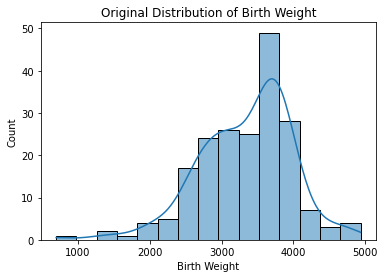

In [56]:
#viweing the distribution for the response variable
sns.histplot( data = bw, 
              x = "bwght", 
              kde = True)
# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") 
plt.ylabel(ylabel = "Count")

# rendering the histogram
plt.show()

In [57]:
#converting the response variable to log
bw['log_bwght'] = np.log(bw['bwght'])

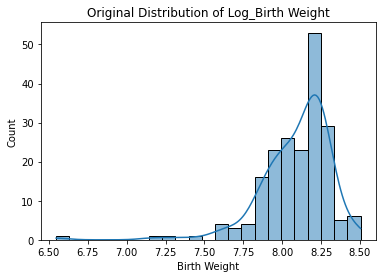

In [58]:
#histogram to view the skewness using log on the rsponse variables
sns.histplot( data = bw, 
              x = "log_bwght", 
              kde = True)
# title and axis labels
plt.title(label   = "Original Distribution of Log_Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

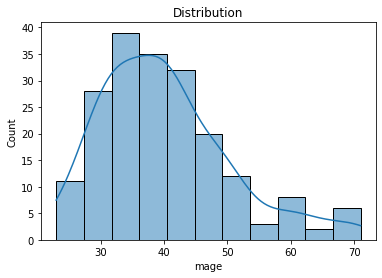

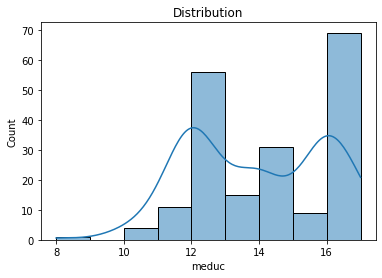

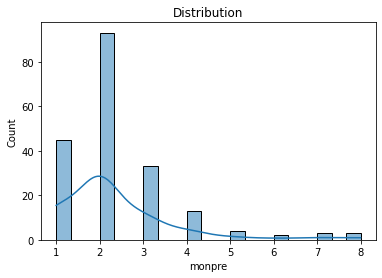

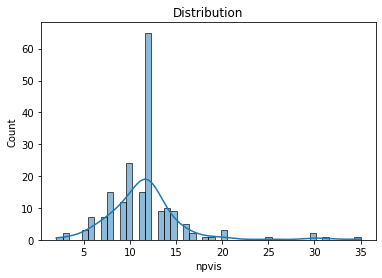

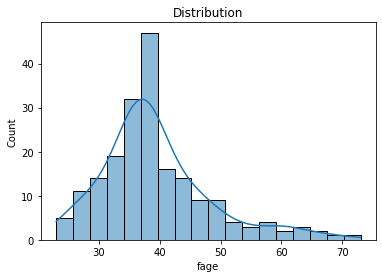

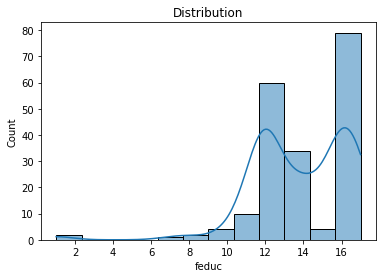

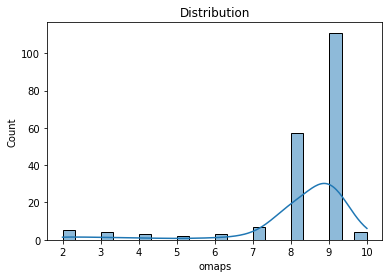

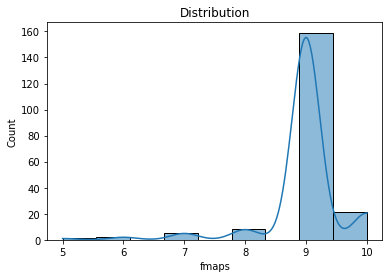

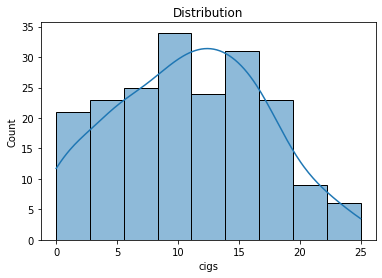

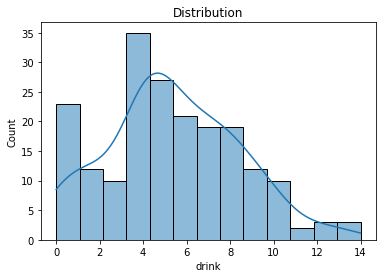

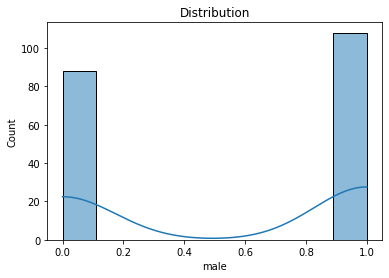

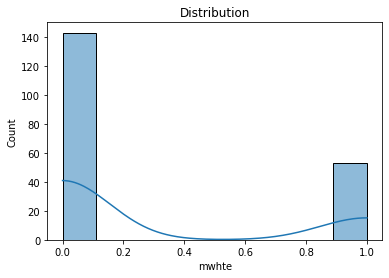

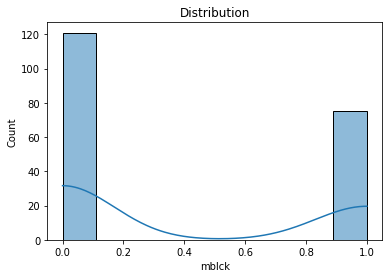

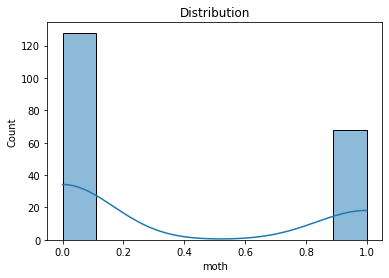

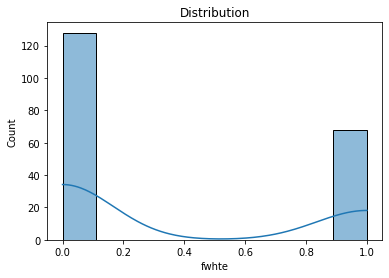

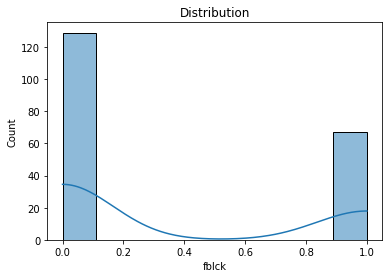

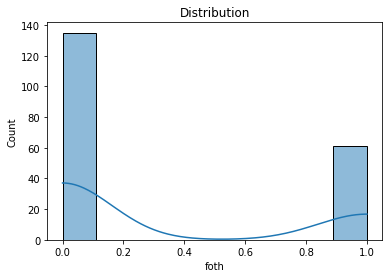

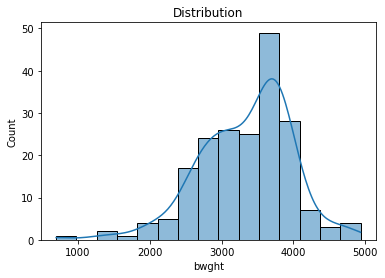

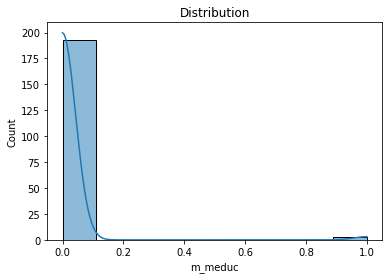

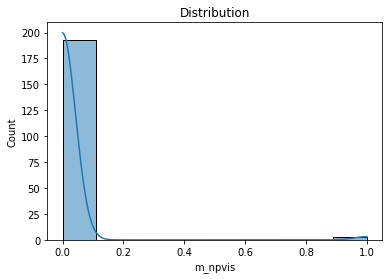

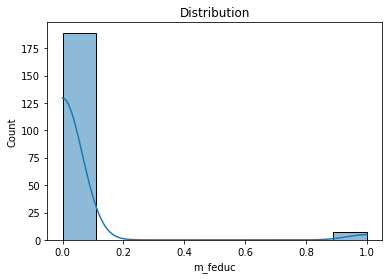

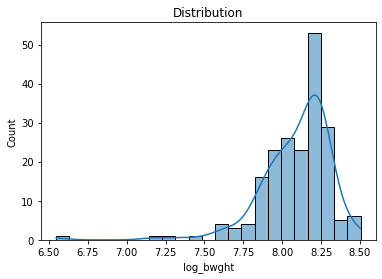

<Figure size 432x288 with 0 Axes>

In [59]:

#For loop to make a histogram for each of the variables to see if they are skewed.
for hist in bw.columns:
    sns.histplot(data = bw,
                 x = hist,
                 kde = True)
#labeling the histogram
    plt.title(label   = "Distribution")
    plt.xlabel(xlabel = hist) # avoiding using dataset labels
    plt.ylabel(ylabel = "Count")
#rendering the histogram
    plt.show()
    plt.tight_layout()

In [60]:
bw.skew()

mage         0.922193
meduc       -0.071834
monpre       2.031858
npvis        2.191428
fage         1.120425
feduc       -1.338531
omaps       -2.641176
fmaps       -2.551277
cigs         0.031881
drink        0.234876
male        -0.206738
mwhte        1.041790
mblck        0.486607
moth         0.648090
fwhte        0.648090
fblck        0.672052
foth         0.821757
bwght       -0.659832
m_meduc      7.957157
m_npvis      7.957157
m_feduc      5.042374
log_bwght   -2.271851
dtype: float64

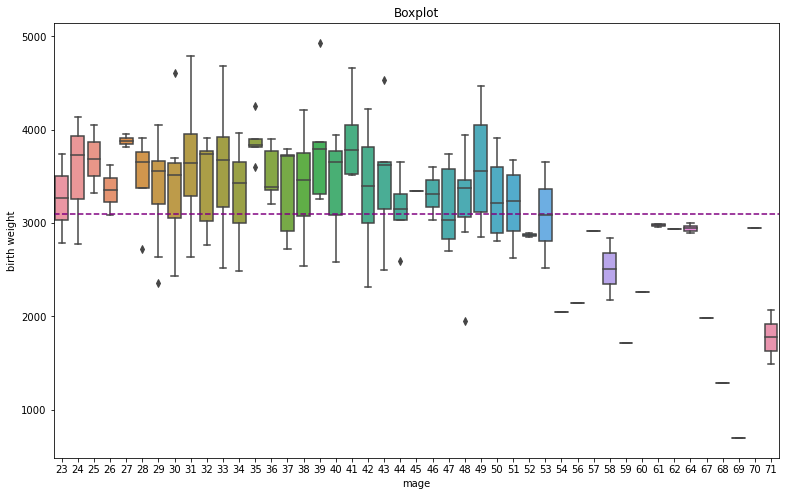

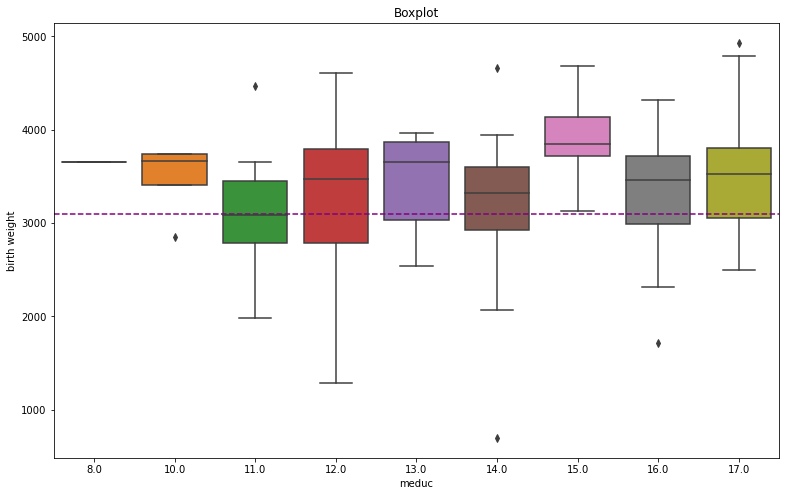

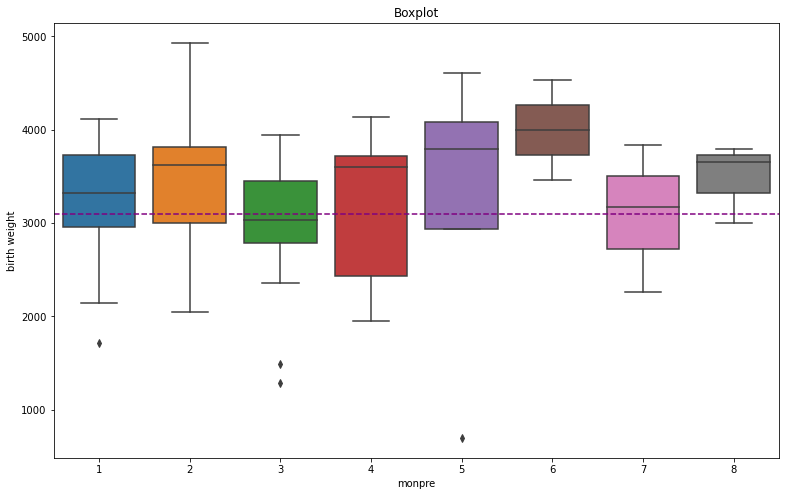

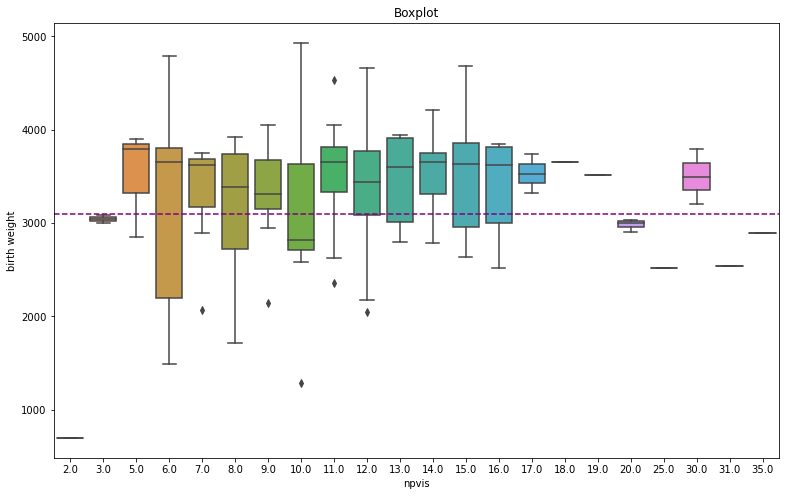

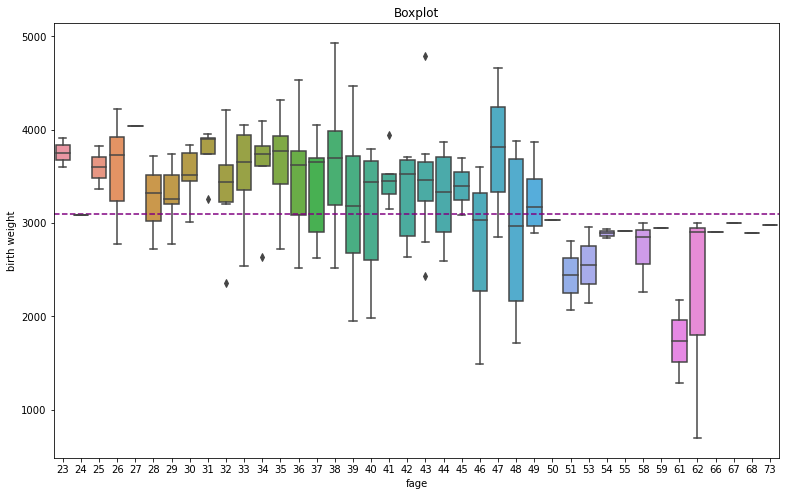

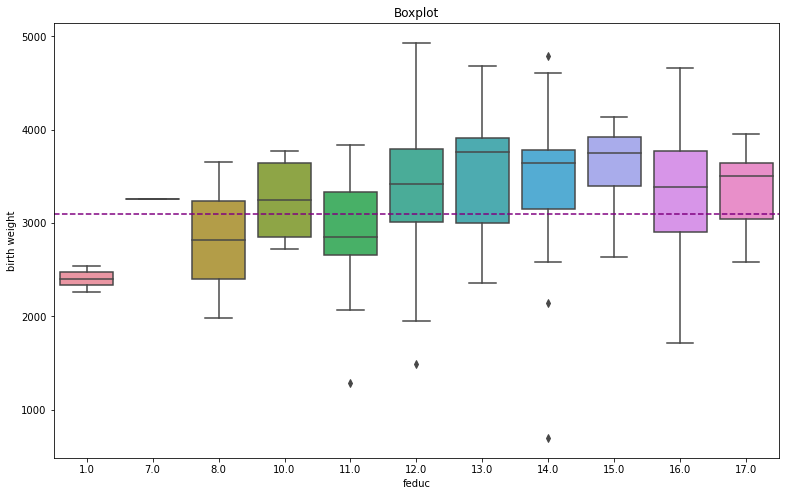

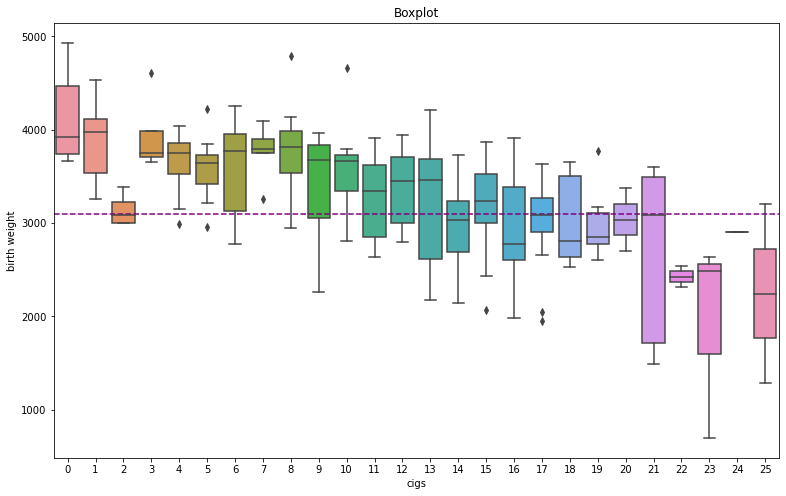

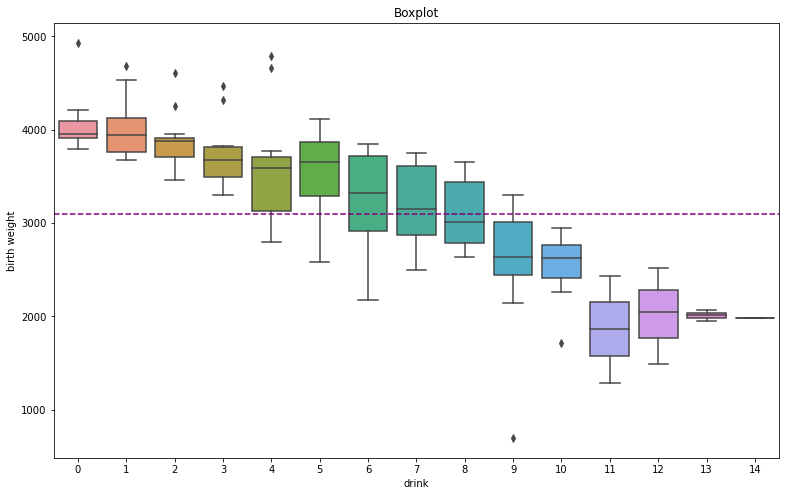

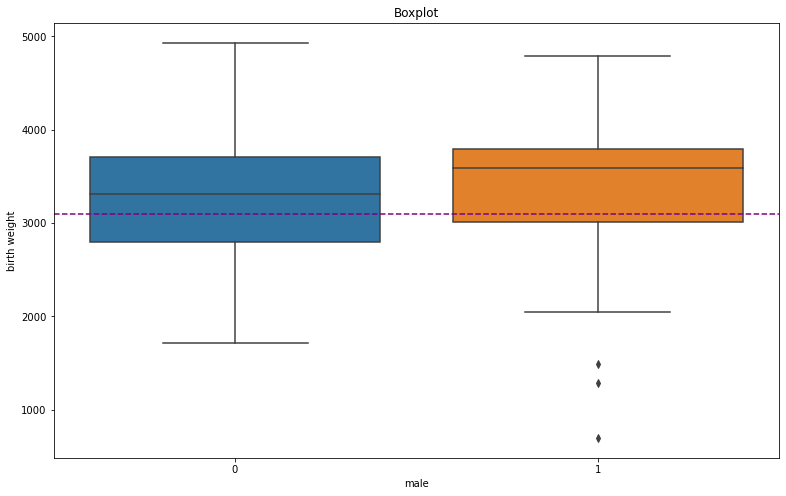

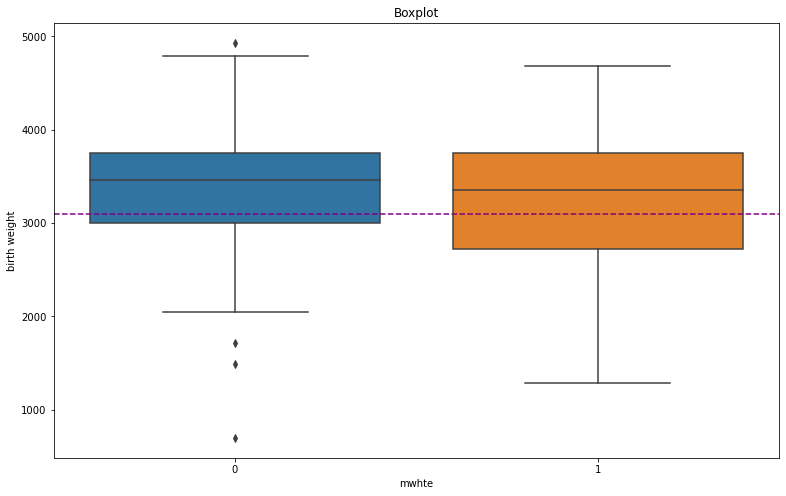

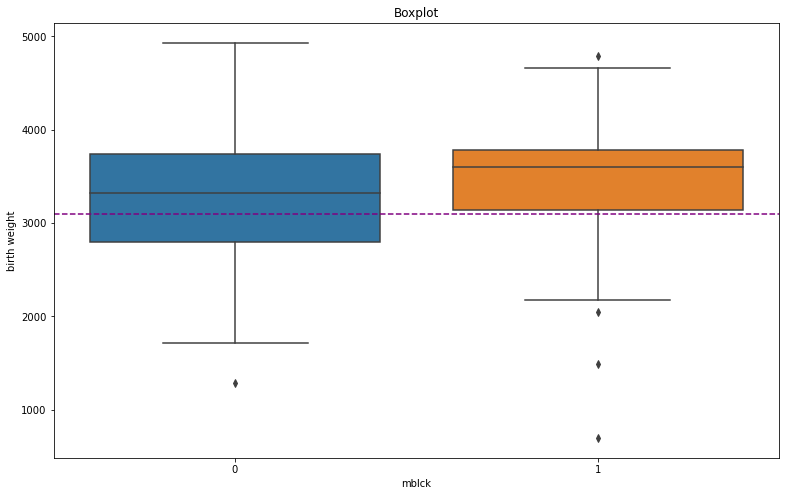

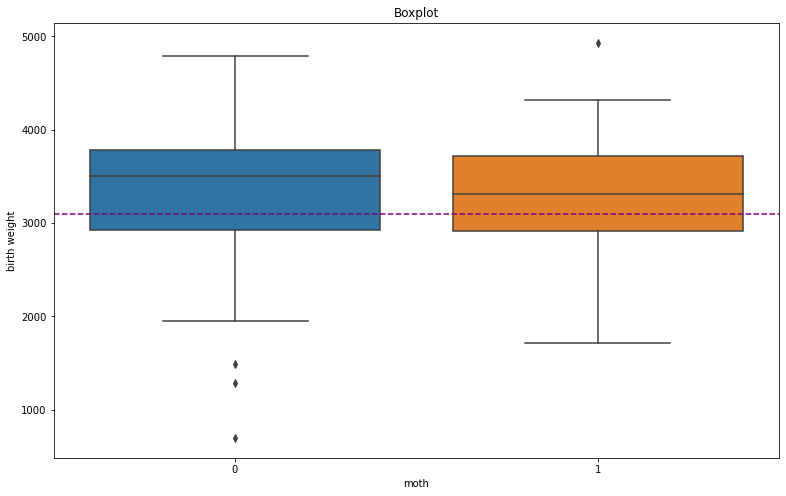

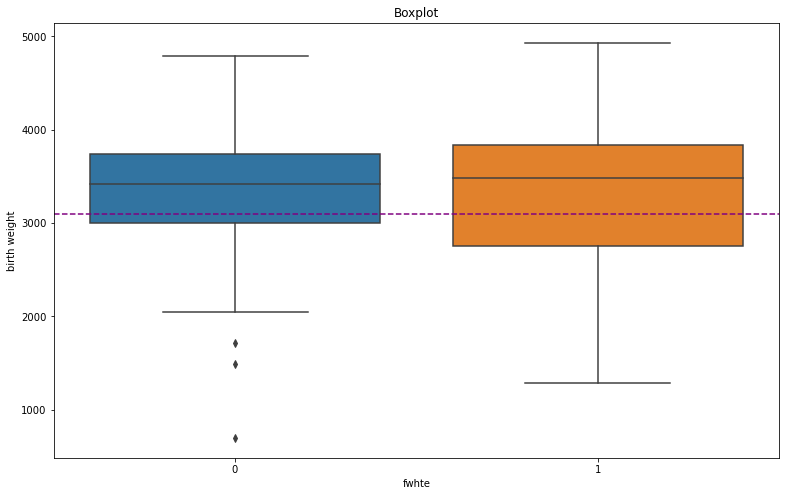

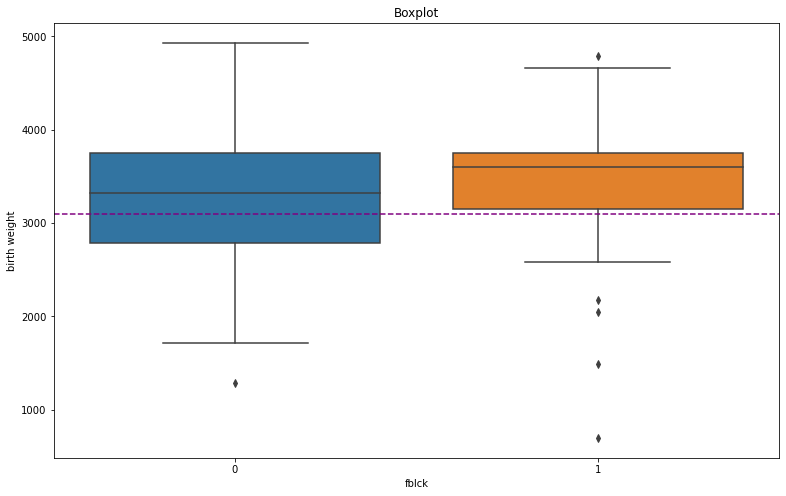

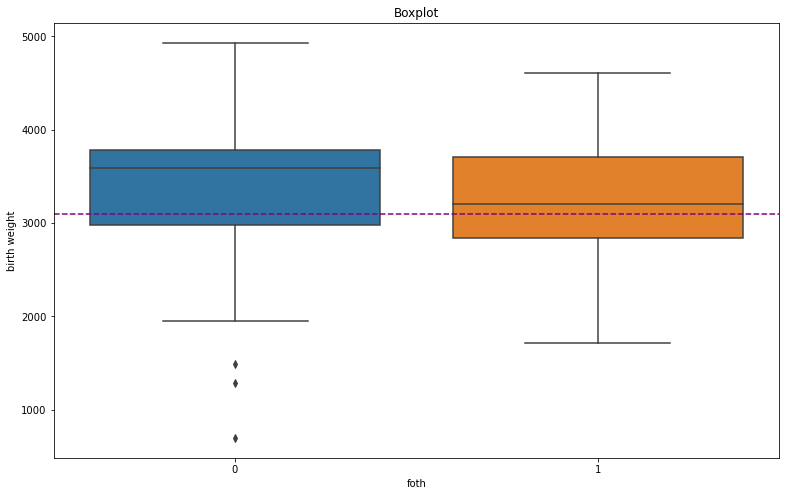

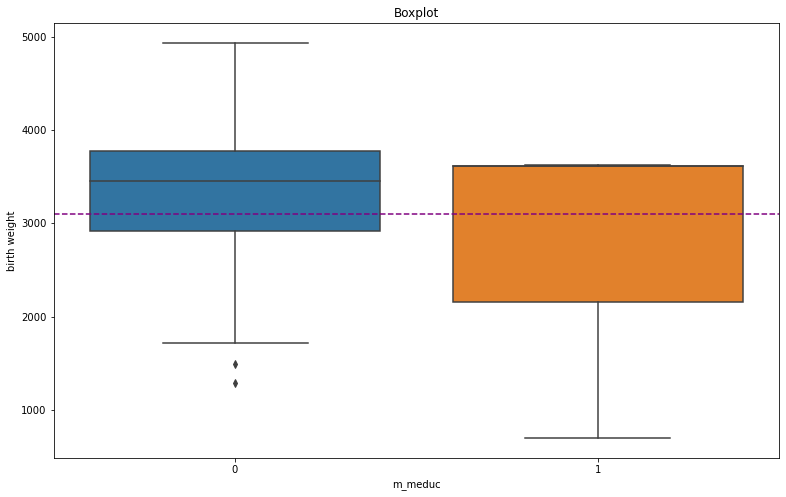

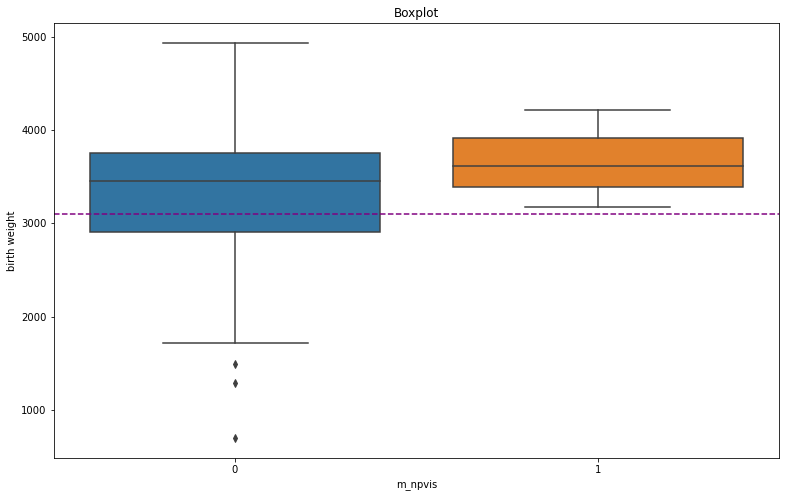

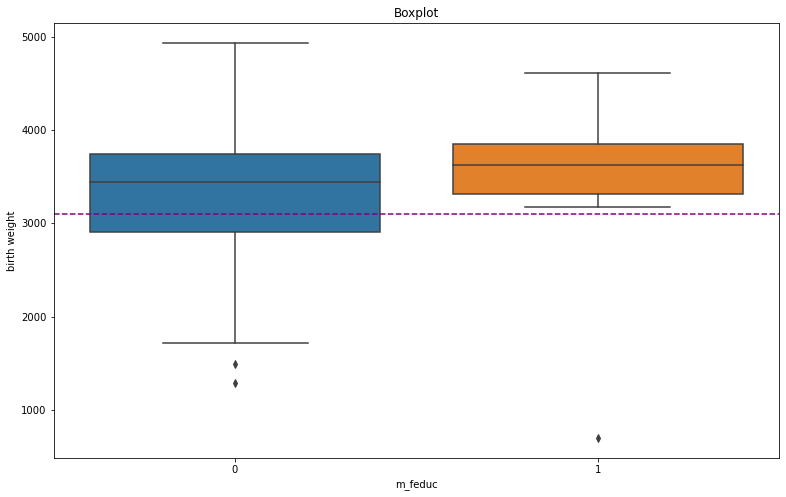

In [61]:
#creating botplox to analyze the data

columns = ['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'm_meduc', 'm_npvis', 'm_feduc']

for items in columns: 
    fig, ax = plt.subplots(figsize =(13, 8))
    sns.boxplot(x    = items,
                y    = 'bwght',
                data = bw)
    plt.axhline(y = 3100, color = "purple", linestyle = '--')

    # titles and axis labels
    plt.title(label   = 'Boxplot')
    plt.xlabel(xlabel = items)
    plt.ylabel(ylabel = 'birth weight')


    # displaying the plot
    plt.show()

In [62]:
#changing the skewed variables to logarithmic 
# log transforming mage and saving it to the dataset
bw['log_mage'] = np.log(bw['mage'])
# log transforming meduc and saving it to the dataset
bw['log_meduc'] = np.log(bw['meduc']+ 0.001)
# log transforming monpre and saving it to the dataset
bw['log_monpre'] = np.log(bw['monpre'])
# log transforming npvis and saving it to the dataset
bw['log_npvis'] = np.log(bw['npvis']+ 0.001)
# log transforming fage and saving it to the dataset
bw['log_fage'] = np.log(bw['fage'])
# log transforming feduc and saving it to the dataset
bw['log_feduc'] = np.log(bw['feduc']+ 0.001)
# log transforming cigs and saving it to the dataset
bw['log_cigs'] = np.log(bw['cigs']+ 0.001)
# log transforming drink and saving it to the dataset
bw['log_drink'] = np.log(bw['drink']+ 0.001)

In [63]:
#viewing the skewenes within the log and normal variables. 
bw.skew()

mage          0.922193
meduc        -0.071834
monpre        2.031858
npvis         2.191428
fage          1.120425
feduc        -1.338531
omaps        -2.641176
fmaps        -2.551277
cigs          0.031881
drink         0.234876
male         -0.206738
mwhte         1.041790
mblck         0.486607
moth          0.648090
fwhte         0.648090
fblck         0.672052
foth          0.821757
bwght        -0.659832
m_meduc       7.957157
m_npvis       7.957157
m_feduc       5.042374
log_bwght    -2.271851
log_mage      0.290296
log_meduc    -0.320483
log_monpre    0.300346
log_npvis    -0.741214
log_fage      0.351215
log_feduc    -5.938619
log_cigs     -3.602743
log_drink    -3.381251
dtype: float64

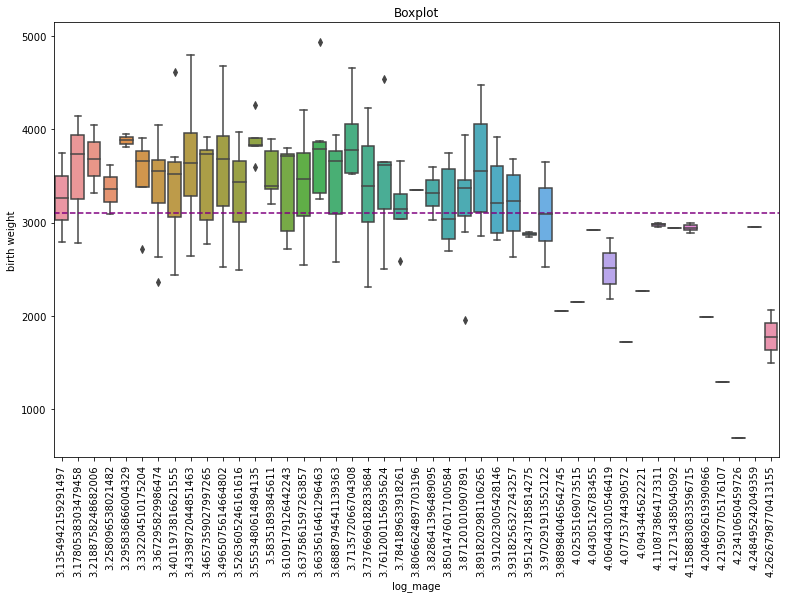

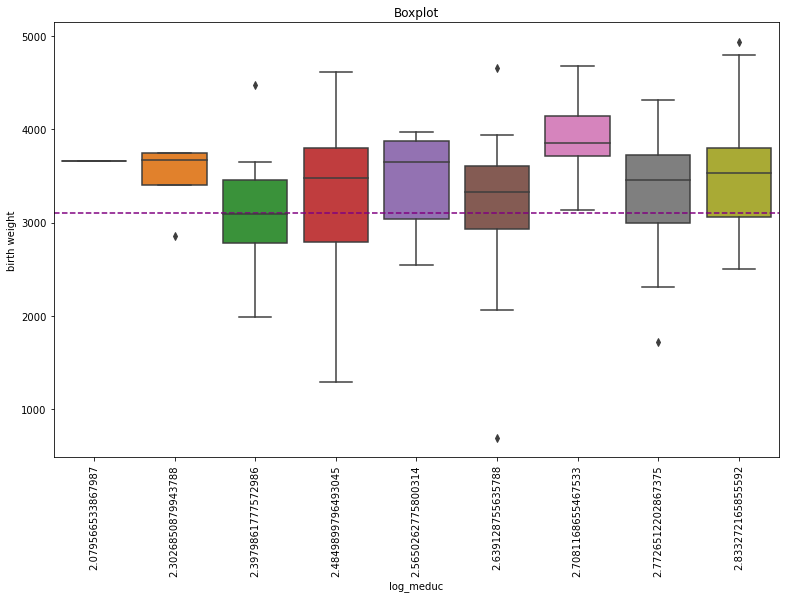

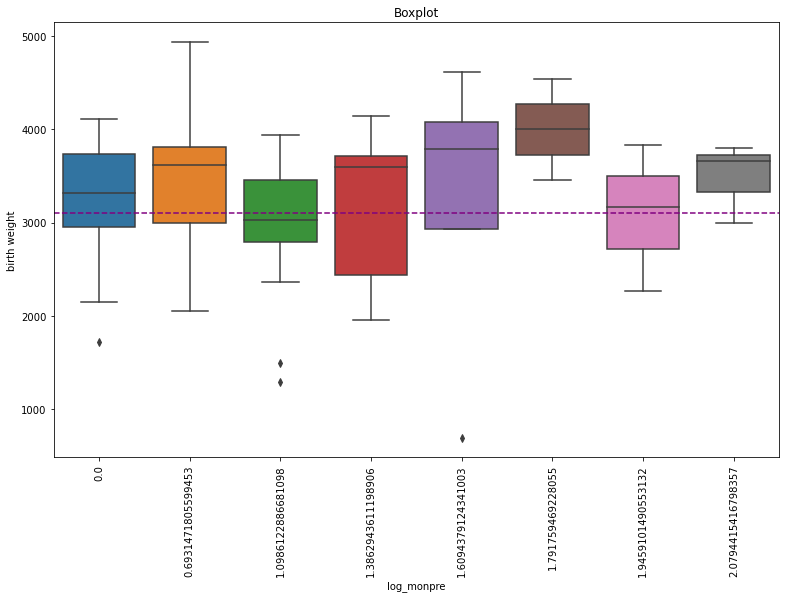

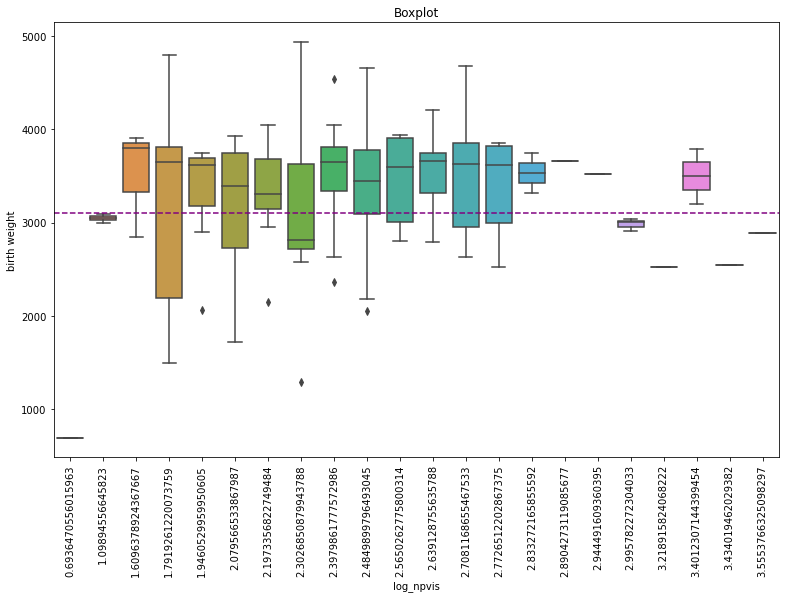

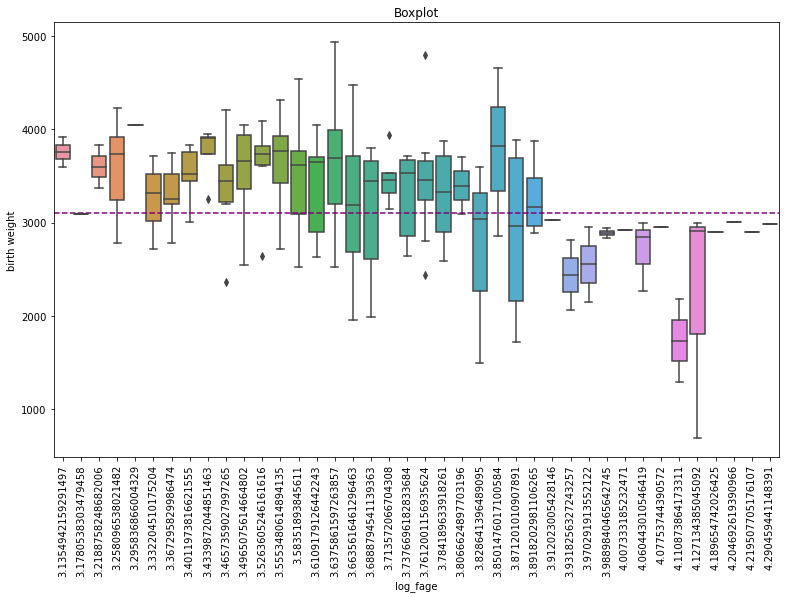

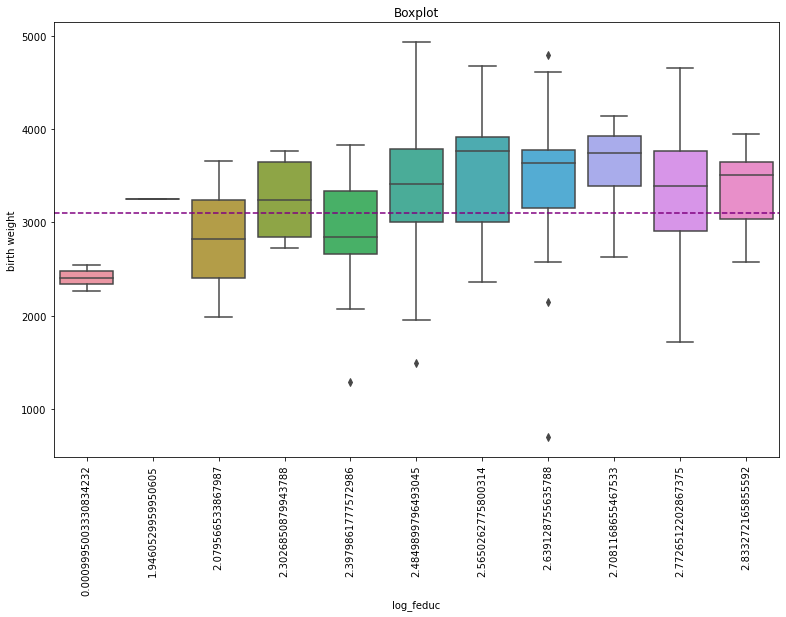

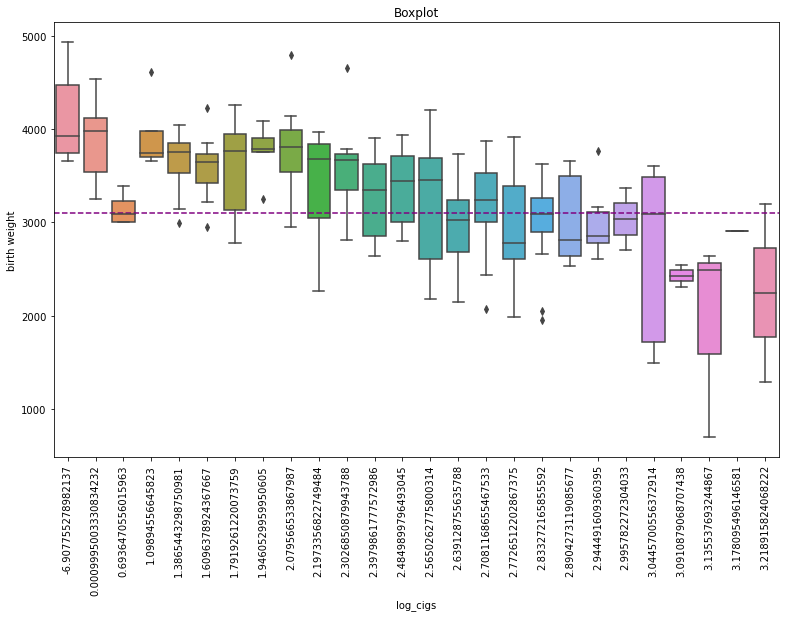

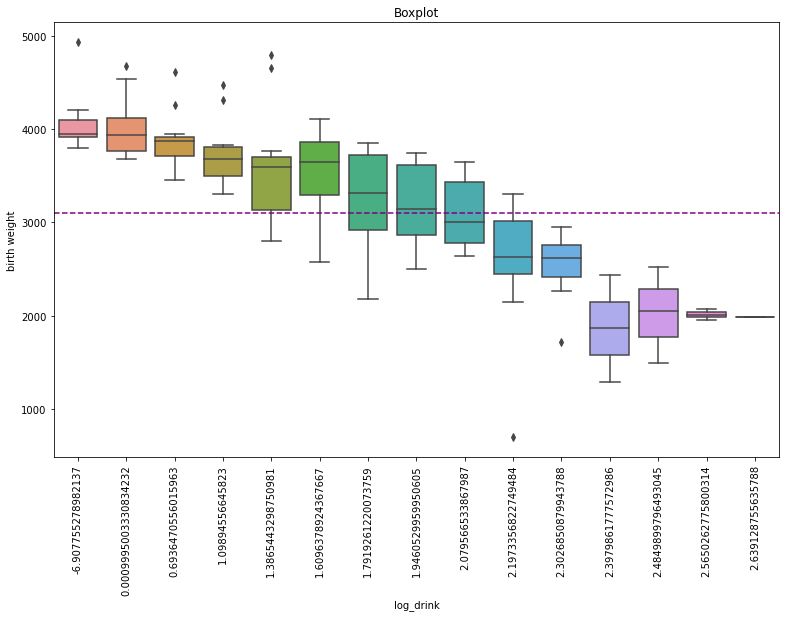

In [64]:
#analyzing the variables witht the logarithmic variables    
columns = ['log_mage','log_meduc', 'log_monpre','log_npvis' , 'log_fage', 'log_feduc',
      'log_cigs', 'log_drink']

for items in columns: 
    fig, ax = plt.subplots(figsize =(13, 8))
    boxplot = sns.boxplot(x    = items,
                y    = 'bwght',
                data = bw)
    plt.axhline(y = 3100, color = "purple", linestyle = '--')
    plt.setp(boxplot.get_xticklabels(), rotation=90)
    # titles and axis labels
    plt.title(label   = 'Boxplot')
    plt.xlabel(xlabel = items)
    plt.ylabel(ylabel = 'birth weight')


    # displaying the plot
    plt.show()

In [65]:
#for loop to correlate the log variables with the normal variables
for col in bw:
    if col[:4] == 'log_':
        var_corr = bw.loc[ : , [col[4:],
                          col,
                         'bwght']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)
        print(var_corr)
    

           bwght  log_bwght  bwght
bwght       1.00       0.97   1.00
log_bwght   0.97       1.00   0.97
bwght       1.00       0.97   1.00
          mage  log_mage  bwght
mage      1.00      0.99  -0.46
log_mage  0.99      1.00  -0.42
bwght    -0.46     -0.42   1.00
           meduc  log_meduc  bwght
meduc       1.00       1.00   0.09
log_meduc   1.00       1.00   0.09
bwght       0.09       0.09   1.00
            monpre  log_monpre  bwght
monpre        1.00        0.94  -0.05
log_monpre    0.94        1.00  -0.06
bwght        -0.05       -0.06   1.00
           npvis  log_npvis  bwght
npvis       1.00       0.92   0.07
log_npvis   0.92       1.00   0.16
bwght       0.07       0.16   1.00
          fage  log_fage  bwght
fage      1.00      0.99  -0.40
log_fage  0.99      1.00  -0.38
bwght    -0.40     -0.38   1.00
           feduc  log_feduc  bwght
feduc       1.00       0.89   0.13
log_feduc   0.89       1.00   0.16
bwght       0.13       0.16   1.00
          cigs  log_cigs  bwght


In [66]:
#categorizing the varibles based on the analysis with the boxplots. 

bw['new_drink'] = 0
bw['new_cigs'] = 0
bw['new_log_fage'] = 0 
 
#for loop to create the categories. 
for index, column in bw.iterrows():
#creating a new variable that states if the person drinks more than 9 drinks the babys weight is affected. 
    if bw.loc[index,'drink']>=9:
        bw.loc[index,'new_drink']=9
    elif bw.loc[index,'drink']<9:
        bw.loc[index,'new_drink'] = bw.loc[index,'drink']
    else:
        print('error')
#creating a new variable that states if the person smokes more than 21 drinks the babys weight is affected. 
    if bw.loc[index,'cigs']>=20:
        bw.loc[index,'new_cigs']=21
    elif bw.loc[index,'cigs']< 20:
        bw.loc[index,'new_cigs'] = bw.loc[index, 'cigs']
    else:
        print('error')
#creating a new variable that states if the mothers age is more than 50 the babys weight is affected.        
    if bw.loc[index,'log_fage'] >= 50:
        bw.loc[index,'new_log_fage']=51
    elif bw.loc[index,'log_fage']< 50:
        bw.loc[index,'new_log_fage'] = bw.loc[index, 'log_fage']
    else:
        print('error')
        
#Interacting variables based on analysis
bw['log_mage_cigs']  = bw['log_mage'] * bw['cigs']
bw['cigs_drink'] = bw['drink']*bw['cigs']
bw['log_mage_drink'] = bw ['drink']* bw['log_mage']
bw['cigs_mwhte'] = bw ['cigs'] * bw['mwhte']

In [67]:
#viewing the columns the data set have. 
bw.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght', 'm_meduc', 'm_npvis', 'm_feduc', 'log_bwght',
       'log_mage', 'log_meduc', 'log_monpre', 'log_npvis', 'log_fage',
       'log_feduc', 'log_cigs', 'log_drink', 'new_drink', 'new_cigs',
       'new_log_fage', 'log_mage_cigs', 'cigs_drink', 'log_mage_drink',
       'cigs_mwhte'],
      dtype='object')

In [68]:
#Analyzing correlation between the variables
bw[["mage", "meduc", 'monpre', 'npvis', 'fage', 'feduc',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'bwght','log_mage', 'log_meduc', 'log_monpre', 'log_npvis', 'log_fage']].corr(method = "pearson")

,mage,meduc,monpre,npvis,fage,feduc,cigs,drink,male,mwhte,...,moth,fwhte,fblck,foth,bwght,log_mage,log_meduc,log_monpre,log_npvis,log_fage
mage,1.000000,-0.094028,0.164198,-0.050935,0.583608,-0.086760,0.167293,0.336698,-0.049694,0.007738,...,0.017395,-0.082203,0.035503,0.048140,-0.463811,0.987543,-0.094625,0.154314,-0.170258,0.551514
meduc,-0.094028,1.000000,-0.232228,0.136712,-0.069698,0.619529,0.103739,-0.071381,-0.033436,-0.284530,...,0.463016,-0.184906,-0.233591,0.429406,0.094206,-0.090843,0.996845,-0.252317,0.196270,-0.053163
monpre,0.164198,-0.232228,1.000000,-0.345678,0.042767,-0.286874,-0.058436,0.015553,-0.075269,0.075486,...,-0.208120,0.037708,0.032603,-0.072167,-0.051827,0.155190,-0.231849,0.935365,-0.455131,0.021988
npvis,-0.050935,0.136712,-0.345678,1.000000,-0.065817,0.030591,0.040976,-0.069127,0.009988,0.035810,...,0.062362,0.029450,-0.067910,0.039294,0.065636,-0.043507,0.143604,-0.329977,0.922140,-0.058541
fage,0.583608,-0.069698,0.042767,-0.065817,1.000000,-0.013147,0.174795,0.291435,-0.085186,0.035367,...,0.025391,-0.027247,-0.032996,0.061815,-0.395985,0.555439,-0.072222,0.057992,-0.131874,0.986494
feduc,-0.086760,0.619529,-0.286874,0.030591,-0.013147,1.000000,0.049043,-0.122493,0.075458,-0.414750,...,0.515404,-0.357027,-0.150448,0.521183,0.131273,-0.076290,0.617843,-0.274264,0.118267,-0.004578
cigs,0.167293,0.103739,-0.058436,0.040976,0.174795,0.049043,1.000000,0.355779,-0.115098,0.033570,...,0.170593,-0.007297,-0.193035,0.205261,-0.572385,0.151505,0.111714,-0.041048,0.000622,0.179913
drink,0.336698,-0.071381,0.015553,-0.069127,0.291435,-0.122493,0.355779,1.000000,-0.092433,0.164619,...,-0.039600,0.071382,-0.095792,0.024750,-0.743125,0.301284,-0.069072,0.040711,-0.102732,0.287207
male,-0.049694,-0.033436,-0.075269,0.009988,-0.085186,0.075458,-0.115098,-0.092433,1.000000,-0.097089,...,-0.031665,-0.031665,0.109894,-0.080029,0.114855,-0.038750,-0.033879,-0.085714,0.020103,-0.082561
mwhte,0.007738,-0.284530,0.075486,0.035810,0.035367,-0.414750,0.033570,0.164619,-0.097089,1.000000,...,-0.443731,0.835258,-0.438745,-0.409230,-0.114388,-0.012264,-0.271515,0.095363,-0.026221,0.043128


## Modeling

#### OLS Regression Not Scikit Learn. 

In [70]:
# preparing explanatory variable data
X = bw.drop(columns = ["log_bwght","bwght"] , axis = 0) 

# preparing response variables

y = bw.loc[: , "bwght"]



# preparing training and testing sets (all letters are lowercase)
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 35)
y-side: (147,)


Testing Data
------------
X-side: (49, 35)
y-side: (49,)



In [71]:
X.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps',
       'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck',
       'foth', 'm_meduc', 'm_npvis', 'm_feduc', 'log_mage', 'log_meduc',
       'log_monpre', 'log_npvis', 'log_fage', 'log_feduc', 'log_cigs',
       'log_drink', 'new_drink', 'new_cigs', 'new_log_fage', 'log_mage_cigs',
       'cigs_drink', 'log_mage_drink', 'cigs_mwhte'],
      dtype='object')

Ols regression based on the information analyzed and p-values. (Different variables from the Scikit Learn. 

In [72]:
#Training

# merging X_train and y_train so that they can be used in statsmodels
X_train = pd.concat([X_train, y_train], axis = 1)


# build a model

lm_best = smf.ols(formula =  """bwght ~  mage  + 
         drink   + log_mage  + cigs 
                               """, 
                              data = X_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     96.09
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.11e-39
Time:                        02:47:40   Log-Likelihood:                -1068.4
No. Observations:                 147   AIC:                             2147.
Df Residuals:                     142   BIC:                             2162.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1370.9769   2114.465     -0.648      0.518   -5550.875    2808.922
mage         -72.7294     18.217     -3.992      0.000    -108.742     -36.717
drink       -102.0511     11.179     -9.129      0.000    -124.150     -79.952
log_mage    2352.1044    770.057      3.054      0.003     829.847    3874.362
cigs         -38.1754      4.975     -7.674      0.000     -48.010     -28.341
==============================================================================
Omnibus:                        2.430   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                2.283
Skew:                           0.058   Prob(JB):                        0.319
Kurtosis:                       3.600   Cond. No.                     3.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### OLS REGRESSION USING SCIKIT LEARN

In [73]:
#Preparing the feature varibales
X_sk = bw.loc[: , ["new_cigs", "drink" , "male", "mwhte",  "log_npvis", "fage"]]


# preparing response variable
y_sk = bw.loc[: , "bwght"]


#Spliting the data
X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(
            X_sk,         # x-variables
            y_sk,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [74]:
#Instantiating the model LR
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_sk_train, y_sk_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_sk_test)

#defining variables
lr_train_score = lr.score(X_sk_train, y_sk_train).round(4)
lr_test_score = lr.score(X_sk_test, y_sk_test).round(4)

# SCORING the results
print('OLS Training Score :', lr.score(X_sk_train, y_sk_train).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(X_sk_test, y_sk_test).round(4)) # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6833
OLS Testing Score  : 0.7016
OLS Train-Test Gap : 0.0183


#### Lasso Model

In [75]:
from sklearn.linear_model import Lasso
# INSTANTIATING a model object
lasso_model = Lasso() # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(X_sk_train, y_sk_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_sk_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_sk_train, y_sk_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(X_sk_test, y_sk_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_sk_train, y_sk_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(X_sk_test, y_sk_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score ).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6832
Lasso Testing Score  : 0.704
Lasso Train-Test Gap : 0.0208


In [76]:
# zipping each feature name to its coefficient
lasso_model_values = zip(X_sk.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4456.54)
('new_cigs', -37.77)
('drink', -116.68)
('male', 45.67)
('mwhte', 15.87)
('log_npvis', 173.08)
('fage', -12.97)


#### ARD MODEL

In [77]:
# INSTANTIATING a model ARD
ard_model = ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_sk_train, y_sk_train)


# PREDICTING on new data
ard_pred =ard_model.predict(X_sk_test)


print('ARD Training Score :', ard_model.score(X_sk_train, y_sk_train).round(4))
print('ARD Testing Score :' , ard_model.score(X_sk_test, y_sk_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_sk_train, y_sk_train).round(4)
ard_test_score  = ard_model.score(X_sk_test, y_sk_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score : 0.6812
ARD Testing Score : 0.721
ARD Train-Test Gap : 0.0398


#### KNN Model

In [78]:
#Scaling the x_variables
from sklearn.preprocessing import StandardScaler 
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(X_sk)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(X_sk)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled) 


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5
count,196.00,196.00,196.00,196.00,196.00,196.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.83,-1.80,-1.11,-0.61,-4.83,-1.82
25%,-0.82,-0.47,-1.11,-0.61,-0.26,-0.51
50%,0.03,-0.13,0.90,-0.61,0.26,-0.14
75%,0.75,0.62,0.90,1.64,0.26,0.41
max,1.72,2.87,0.90,1.64,3.29,3.76


In [79]:
#spliting into testing and training the data. 
x_sc_train, x_sc_test, y_sc_train, y_sc_test = train_test_split(
            X_scaled_df,
            y_sk,
            test_size = 0.25,
            random_state = 219)

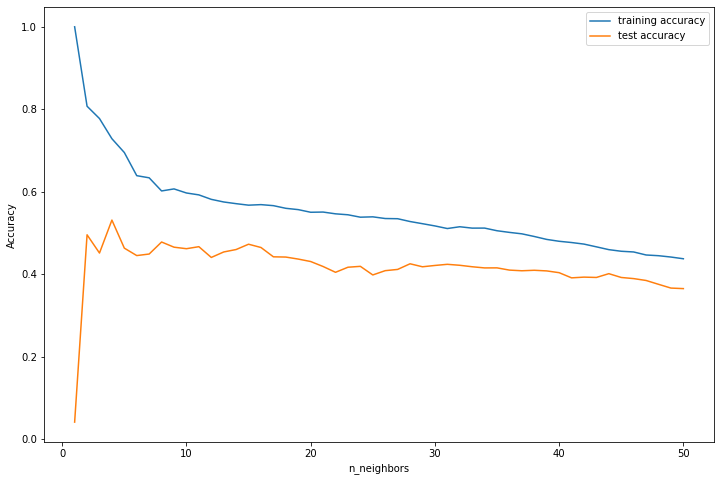

In [80]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_sc_train,y_sc_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_sc_train,y_sc_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_sc_test, y_sc_test ))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [81]:
# INSTANTIATING a model KNN
knn_model = KNeighborsRegressor(n_neighbors = 4)

# FITTING the training data
knn_fit = knn_model.fit(x_sc_train, y_sc_train)

# PREDICTING on new data
knn_predict = knn_model.predict(x_sc_test)

# SCORING the results
print('KNN Training Score :' , knn_model.score(x_sc_train, y_sc_train).round(4))
print('KNN Testing Score  :' , knn_model.score(x_sc_test, y_sc_test).round(4))

#saving scoring data for future use
knn_train_score = knn_model.score(x_sc_train, y_sc_train).round(4) # using R-square
knn_test_score  = knn_model.score(x_sc_test, y_sc_test).round(4)   # using R-square

#displaying and saving the gap between training and testing
print('KNN Train-Test Gap :', abs(knn_train_score - knn_test_score).round(4))
knn_test_gap = abs(knn_train_score - knn_test_score).round(4)


KNN Training Score : 0.7286
KNN Testing Score  : 0.5313
KNN Train-Test Gap : 0.1973


In [82]:
# comparing results

print(f"""
Model              Train Score     Test Score        Test/Train Gap
-----               -----------    ----------        ---------------
OLS               {lr_train_score}           {lr_test_score}            {ard_test_gap}
Lasso             {lasso_train_score}           {lasso_test_score}             {lasso_test_gap}
ARD(Final Model)  {ard_train_score}           {ard_test_score}            {ard_test_gap}
KNN               {knn_train_score}           {knn_test_score}             {knn_test_gap}
""")


Model              Train Score     Test Score        Test/Train Gap
-----               -----------    ----------        ---------------
OLS               0.6833           0.7016            0.0398
Lasso             0.6832           0.704             0.0208
ARD(Final Model)  0.6812           0.721            0.0398
KNN               0.7286           0.5313             0.1973

